In [1]:
import numpy as np

import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-talk')
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

np.random.seed(1596)

N_SAMPLES = 10000

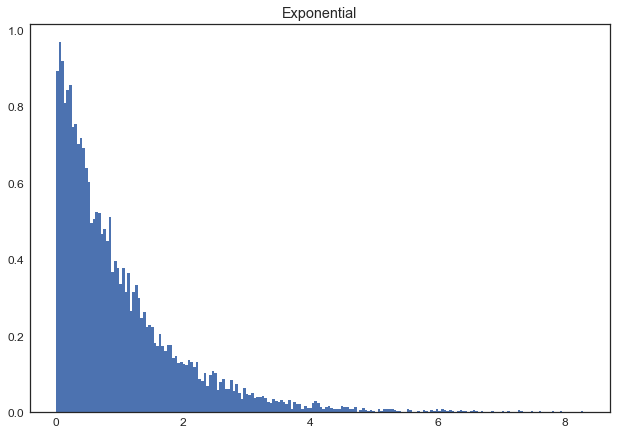

In [2]:
#  Negative Exponential with λ= 1
# In probability theory and statistics, the exponential distribution
# (also known as negative exponential distribution) is the probability 
# distribution that describes the time between events in a Poisson 
# point process, i.e. a process in which events occur continuously 
# and independently at a constant average rate

#  Beta is the scale parameter, which is the inverse of the rate parameter \lambda = 1/\beta.

beta = 1
exponential_samples = np.random.exponential(beta, N_SAMPLES)
# plt.plot(np.arange(1000), exponential_samples)
plt.hist(exponential_samples, bins=200, normed=True)
plt.title('Exponential')

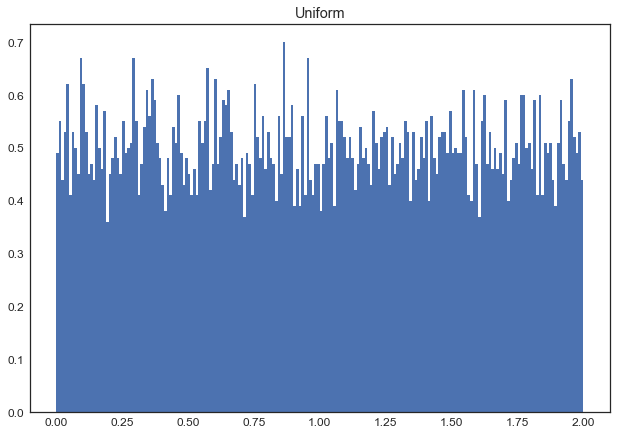

In [3]:
# Uniform samples in (0,2) range
uniform_samples = np.random.uniform(0,2,N_SAMPLES)
# plt.plot(np.arange(1000), uniform_samples)
plt.hist(uniform_samples, bins=200, normed=True)
plt.title('Uniform')

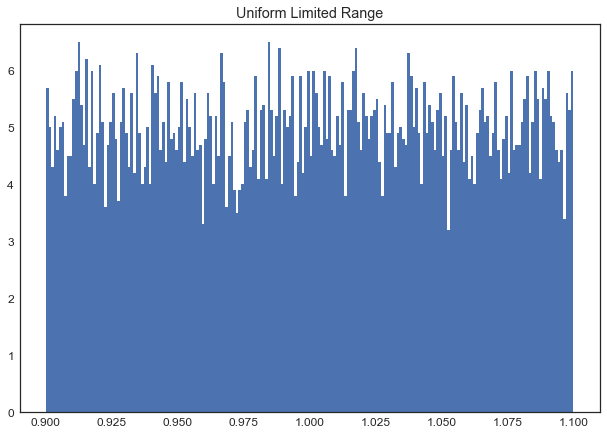

In [4]:
# Uniform samples in (0.9,1.1) range
uniform_samples_limited = np.random.uniform(0.9,1.1,N_SAMPLES)
# plt.plot(np.arange(1000), uniform_samples_limited)
plt.hist(uniform_samples_limited, bins=200, normed=True)
plt.title('Uniform Limited Range')

In [5]:
# triangular_samples = np.random.uniform(0,1,N_SAMPLES)
# triangular_samples = triangular_samples ** 0.5
# triangular_samples *= 0.5
# # plt.plot(np.arange(1000), triangular_samples)

# plt.hist(triangular_samples, bins=200, normed=True)
# plt.title('Triangular')

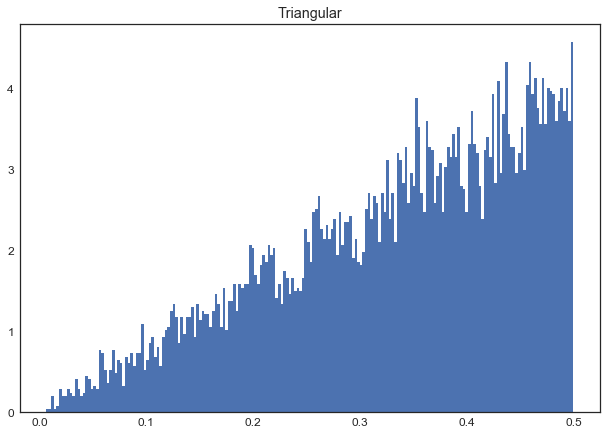

In [6]:
# This distribution corresponds to the one presented in the papers
# I.e. 0.5 (rand)^0.5 is the same as a triangular distribution with left = 0, right = 0.5, mode = 0.5
triang = np.random.triangular(left=0, mode=0.5, right=0.5, size=N_SAMPLES)
# plt.plot(np.arange(1000), triang)
plt.hist(triang, bins=200, normed=True)
plt.title('Triangular')

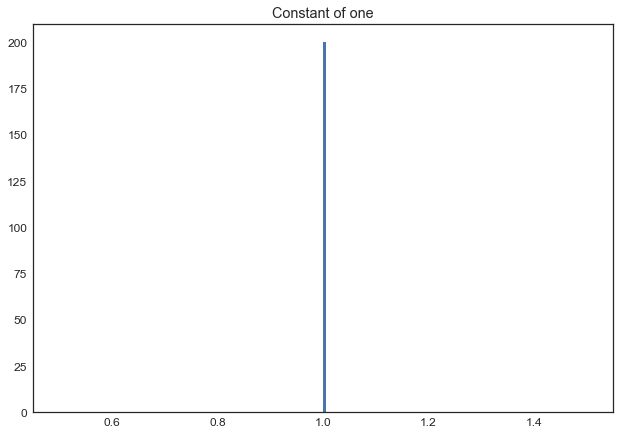

In [7]:
# Constant value of 1
constant = np.ones(N_SAMPLES)
# plt.plot(np.arange(1000), triang)
plt.hist(constant, bins=200, normed=True)
plt.title('Constant of one')

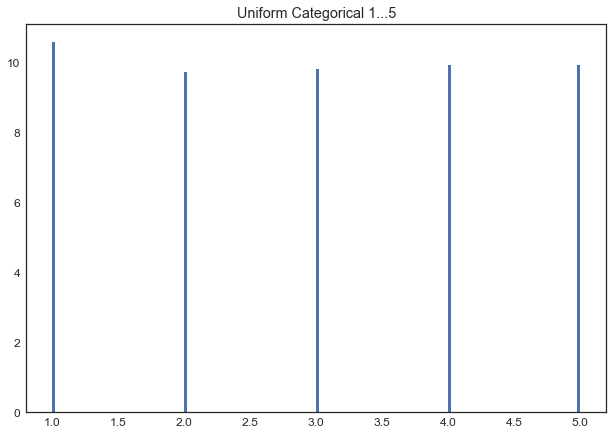

In [8]:
# Discrete with uniform probability interval∈[1...5]
categorical_5 = np.random.multinomial(1, [1/5]*5, N_SAMPLES)
# Convert outputs into actual numbers 1..5 instead of array [0,1,0,0,0]
cat_5_samples = [np.argmax(sample) + 1 for sample in categorical_5]

plt.hist(cat_5_samples, bins=200, normed=True)
plt.title('Uniform Categorical 1...5')

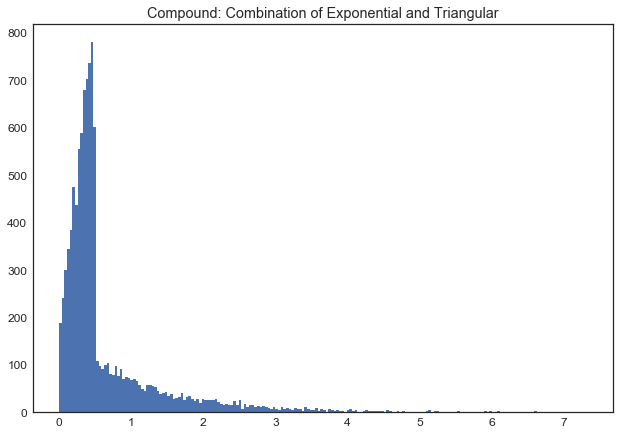

In [9]:
# Compound (distribution1, distribution2, N)
# exponential_samples = np.random.exponential(1, N)
halfway = int(N_SAMPLES/2)
compound_samples = np.empty(N_SAMPLES)
compound_samples[0:halfway] = exponential_samples[0:halfway]
compound_samples[halfway+1:] = triang[halfway+1:]

plt.hist(compound_samples, bins=200, normed=False)
plt.title('Compound: Combination of Exponential and Triangular')

/Users/cedricseger/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


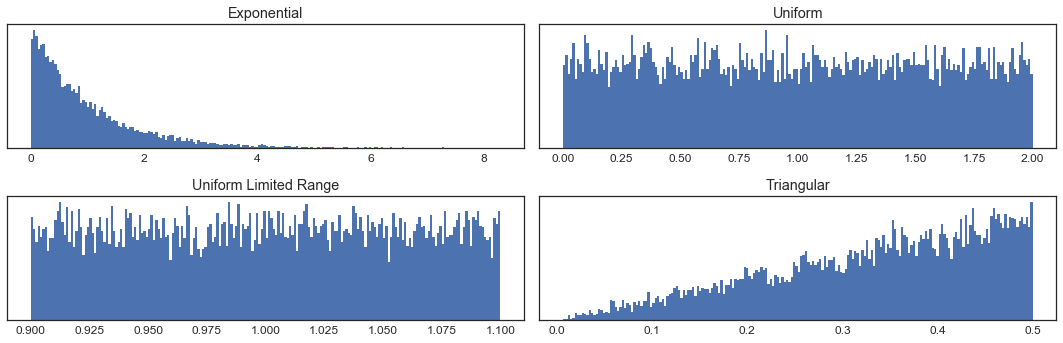

In [10]:
# Comparison of all continous distributions
f, axs = plt.subplots(2, 2, figsize=(15,5))
print(axs[1])
axs[0][0].hist(exponential_samples, bins=200, normed=True)
axs[0][0].set_title('Exponential')
axs[0][0].get_yaxis().set_visible(False)

axs[0][1].hist(uniform_samples, bins=200, normed=True)
axs[0][1].set_title('Uniform')
axs[0][1].get_yaxis().set_visible(False)

axs[1][0].hist(uniform_samples_limited, bins=200, normed=True)
axs[1][0].set_title('Uniform Limited Range')
axs[1][0].get_yaxis().set_visible(False)

axs[1][1].hist(triang, bins=200, normed=True)
axs[1][1].set_title('Triangular')
axs[1][1].get_yaxis().set_visible(False)

f.set_tight_layout(True)

/Users/cedricseger/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


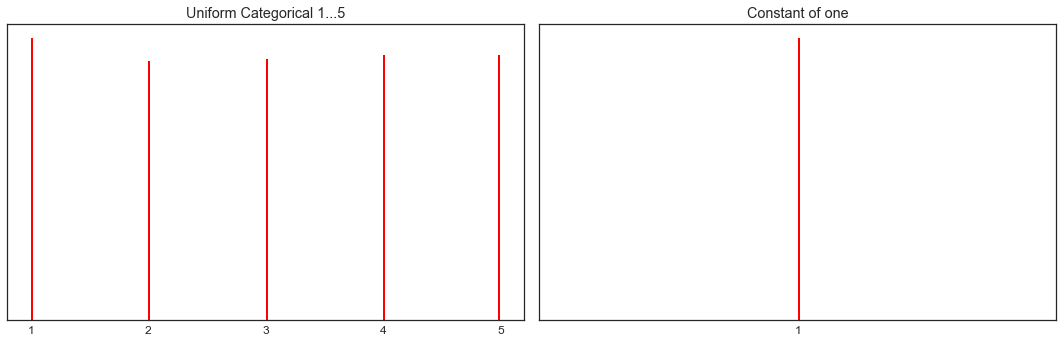

In [11]:
# Comparison of all Discrete distributions
f, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].hist(cat_5_samples, bins=200, normed=True, facecolor='red')
axs[0].set_title('Uniform Categorical 1...5')
axs[0].get_yaxis().set_visible(False)
axs[0].get_xaxis().set_ticks([1,2,3,4,5])

axs[1].hist(constant, bins=200, normed=True, facecolor='red')
axs[1].set_title('Constant of one')
axs[1].get_yaxis().set_visible(False)
axs[1].get_xaxis().set_ticks([1])

f.set_tight_layout(True)

In [12]:
# Think about scaling... now using 6 decimal points
with open('samples/exponential_samples.txt', 'w') as output:
    for sample in exponential_samples:
        output.write('{:10.6f}\n'.format(sample))
        
with open('samples/uniform_samples.txt', 'w') as output:
    for sample in uniform_samples:
        output.write('{:10.6f}\n'.format(sample))
        
with open('samples/uniform_samples_limited.txt', 'w') as output:
    for sample in uniform_samples_limited:
        output.write('{:10.6f}\n'.format(sample))
        
with open('samples/triangular.txt', 'w') as output:
    for sample in triang:
        output.write('{:10.6f}\n'.format(sample))
        
with open('samples/compound.txt', 'w') as output:
    for sample in compound_samples:
        output.write('{:10.6f}\n'.format(sample))

with open('samples/constant_1.txt', 'w') as output:
    for sample in constant:
        output.write('{:10.6f}\n'.format(sample))
        
with open('samples/categorical_5.txt', 'w') as output:
    for sample in cat_5_samples:
        output.write('{:10.6f}\n'.format(sample))